<font color="#CA3532"><h1 align="left">TFM: Evaluación de daños por terremotos.</h1></font>
<font color="#CA3532"><h3 align="left">PASO 3: Selección de variables</h3></font>
<font color="#6E6E6E"><h3 align="right">Pilar Campos López</h3></font> 
<font color="#6E6E6E"><h3 align="right">Silvia Saenz</h3></font> 
<font color="#6E6E6E"><h3 align="right">Ana de Antonio</h3></font> 

El objetivo de este notebook es realizar diferentes técnicas de reducción de variables y evaluar cuál es la mejor en nuestro caso.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

pd.set_option ("display.max_rows", None)
pd.set_option ("display.max_columns", None)
pd.set_option ("display.max_colwidth",200)

# PCA

Hacemos un PCA con todas las variables para ver cómo de solapadas están las clases.
En teoria deberian de estar menos solapadas que antes porque hemos agrupado las clases en 2:
0: g1+g2+g3 (daños bajos-medios)
1: g4+g5 (daños altos)
Asumimos que hay errores en la recogida de datos, pero al agrupar asi las clases, deberia de minimizarse.

In [2]:
df=pd.read_csv("./Data/paso_2_agrupaciones.csv", sep=',')

In [3]:
df.shape

(818700, 35)

In [4]:
df.dtypes

Unnamed: 0                                  int64
ward_id                                     int64
count_floors_pre_eq                         int64
age_building                              float64
plinth_area_sq_ft                         float64
height_ft_pre_eq                          float64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64
has_superstructure_cement_mortar_brick      int64
has_superstructure_timber                   int64


In [5]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df.damage_grade = le.fit_transform(df.damage_grade)


class_column = 'damage_grade'
classes_names = df['damage_grade'].unique()
attribute_names = list(df.columns)
attribute_names.remove(class_column)

y = df.damage_grade

print(class_column)
print(classes_names)
print(attribute_names)

damage_grade
[1 0]
['ward_id', 'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'gender_household_head', 'age_household_head', 'caste_household', 'education_level_household_head', 'income_level_household', 'size_household', 'is_bank_account_present_in_household']


In [7]:
X = df.drop(["damage_grade",], axis=1)
X =  pd.get_dummies(X, drop_first= False) 

In [8]:
X.shape

(818700, 67)

In [9]:
X.dtypes

ward_id                                         int64
count_floors_pre_eq                             int64
age_building                                  float64
plinth_area_sq_ft                             float64
height_ft_pre_eq                              float64
has_superstructure_adobe_mud                    int64
has_superstructure_mud_mortar_stone             int64
has_superstructure_stone_flag                   int64
has_superstructure_cement_mortar_stone          int64
has_superstructure_mud_mortar_brick             int64
has_superstructure_cement_mortar_brick          int64
has_superstructure_timber                       int64
has_superstructure_bamboo                       int64
has_superstructure_rc_non_engineered            int64
has_superstructure_rc_engineered                int64
has_superstructure_other                        int64
count_families                                  int64
has_secondary_use                               int64
age_household_head          

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [11]:
pca = PCA()
X_pca= pca.fit_transform(X_std)
pca.components_

array([[ 3.77558920e-02, -5.73431269e-02, -1.04674966e-01, ...,
        -2.11912365e-01,  3.45392353e-02,  2.53515309e-01],
       [ 4.17702399e-02, -1.24767307e-02, -7.48548227e-02, ...,
         1.34151206e-01,  6.52792343e-02, -3.00296775e-01],
       [-2.31209373e-02,  4.20129767e-01,  1.43389437e-01, ...,
        -1.26428716e-01,  9.86651700e-02,  2.62746524e-02],
       ...,
       [-0.00000000e+00,  1.13544326e-17,  8.17291256e-17, ...,
         1.80181151e-01,  1.26873322e-01, -2.90821044e-01],
       [-0.00000000e+00, -7.82165197e-18, -1.11201318e-17, ...,
         4.69764186e-17,  2.27302084e-17,  2.86858105e-16],
       [ 0.00000000e+00,  4.40664276e-17, -4.06904658e-17, ...,
        -9.22417918e-04, -6.49514251e-04,  6.02950398e-01]])

In [12]:
print(X.shape)
print(X_std.shape)
print(X_pca.shape)

(818700, 67)
(818700, 67)
(818700, 67)


In [13]:
print()
print('-- Estadísticas de los datos proyectados en las componentes principales --')
print()
#pd.DataFrame(X_pca).describe()

for i in range(X_pca.shape[1]):
    print("* Datos en componente principal", i+1, ":")
    print("  - Media    :", X_pca[:,i].mean().round(3))
    print("  - Varianza :", X_pca[:,i].var(ddof=1).round(3))
    print("  - Autovalor:", pca.explained_variance_[i].round(3))
    print("  - Varianza explicada:", (100*pca.explained_variance_ratio_[i]).round(3), "%")
    print()


-- Estadísticas de los datos proyectados en las componentes principales --

* Datos en componente principal 1 :
  - Media    : 0.0
  - Varianza : 6.894
  - Autovalor: 6.894
  - Varianza explicada: 10.289 %

* Datos en componente principal 2 :
  - Media    : -0.0
  - Varianza : 5.867
  - Autovalor: 5.867
  - Varianza explicada: 8.757 %

* Datos en componente principal 3 :
  - Media    : 0.0
  - Varianza : 3.58
  - Autovalor: 3.58
  - Varianza explicada: 5.343 %

* Datos en componente principal 4 :
  - Media    : -0.0
  - Varianza : 2.366
  - Autovalor: 2.366
  - Varianza explicada: 3.531 %

* Datos en componente principal 5 :
  - Media    : -0.0
  - Varianza : 2.088
  - Autovalor: 2.088
  - Varianza explicada: 3.116 %

* Datos en componente principal 6 :
  - Media    : -0.0
  - Varianza : 1.983
  - Autovalor: 1.983
  - Varianza explicada: 2.959 %

* Datos en componente principal 7 :
  - Media    : -0.0
  - Varianza : 1.972
  - Autovalor: 1.972
  - Varianza explicada: 2.943 %

* Datos e

  - Varianza : 0.0
  - Autovalor: 0.0
  - Varianza explicada: 0.0 %



Cuando estamos por debajo de la linea roja, quiere decir que esos componentes no explican mucho
Vemos que la varianza se estabiliza en 7. Más o menos vemos que necesitamos los 7 primeros componentes el segundo grafico es acumulativo

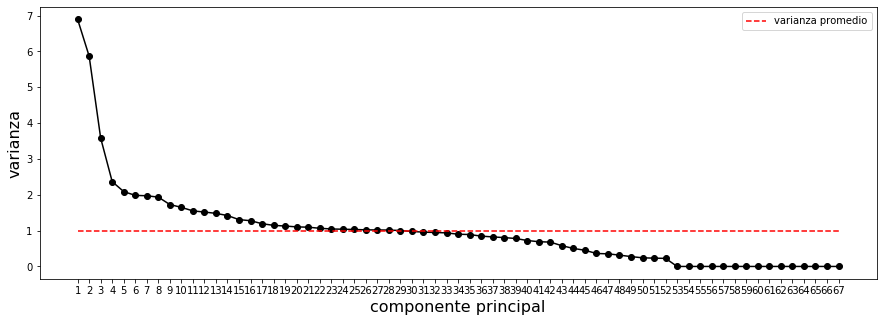

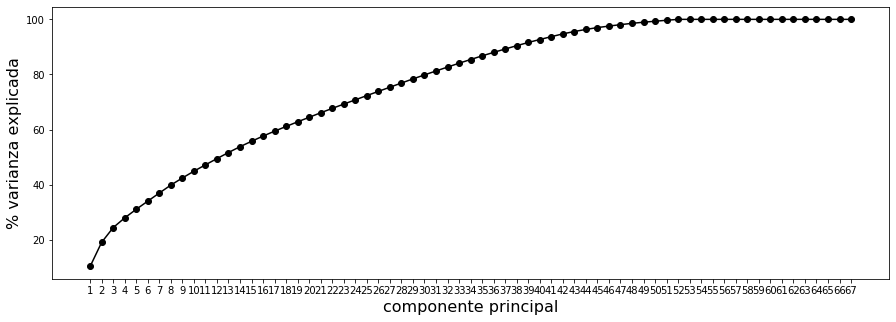

In [14]:
plt.figure(figsize=(15,5))
plt.plot(range(1,pca.n_components_+1), pca.explained_variance_, '-ok')
plt.plot([1,pca.n_components_], [1,1], '--r', label='varianza promedio')
plt.legend()
plt.xlabel('componente principal', fontsize=16)
plt.ylabel('varianza', fontsize=16)
plt.xticks(range(1,pca.n_components_+1));

plt.figure(figsize=(15,5))
plt.plot(range(1,pca.n_components_+1),
         100*pca.explained_variance_ratio_.cumsum(), '-ok')
plt.xlabel('componente principal', fontsize=16)
plt.ylabel('% varianza explicada', fontsize=16)
plt.xticks(range(1,pca.n_components_+1));

Cuando estamos por debajo de la linea roja, quiere decir que esos componentes no explican mucho
Vemos que la varianza se estabiliza en 16-20. Más o menos vemos que necesitamos los 7 primeros componentes
el segundo grafico es acumulativo

In [15]:
pcs_names = ['principal component '+str(i+1) for i in range(pca.n_components_)]
pcs_names_short = ['pc '+str(i+1) for i in range(pca.n_components_)]

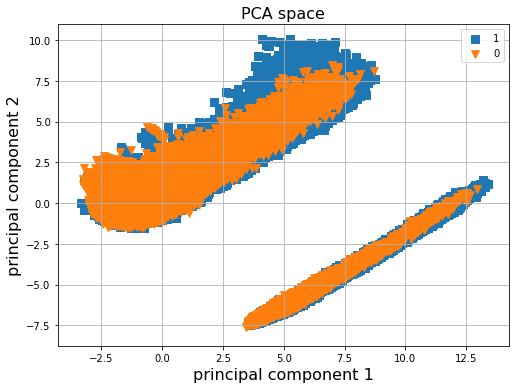

In [16]:
pc_x = 0
pc_y = 1

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['s', 'v', 'o', 'd', 's', 'v', 'o', 'd', 's']

fig = plt.figure(figsize=(7,5))
for label,color,marker in zip(classes_names,colors,markers):
    inds = np.where(y == label)[0]
    plt.scatter(X_pca[inds, pc_x],
                X_pca[inds, pc_y],
                s = 60,
                c = color,
                marker = marker,
                alpha = 1.0,
                cmap='RdYlGn',
                label = label)

plt.legend(); plt.grid(); plt.tight_layout()
plt.title('PCA space', fontsize=16)
plt.xlabel(pcs_names[pc_x], fontsize=16)
plt.ylabel(pcs_names[pc_y], fontsize=16)
plt.show()
#PCA me agrupa los vinos y nosotros no le hemos dado la columna de tipo de vino 
# con la segunda componente podemos separa el naranja del verde y azul
# las componentes no son explicables. No podemos saber que a que variables corresponden

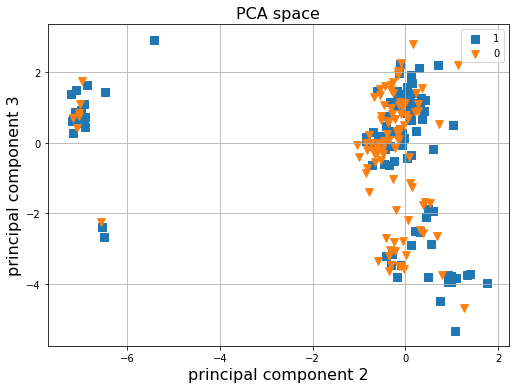

In [17]:
pc_x = 1
pc_y = 2

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['s', 'v', 'o', 'd', 's', 'v', 'o', 'd', 's']

fig = plt.figure(figsize=(7,5))
for label,color,marker in zip(classes_names,colors,markers):
    inds = np.where(y == label)[0]
    plt.scatter(X_pca[inds, pc_x][:100],
                X_pca[inds, pc_y][:100],
                s = 60,
                c = color,
                marker = marker,
                alpha = 1.0,
                cmap='RdYlGn',
                label = label)

plt.legend(); plt.grid(); plt.tight_layout()
plt.title('PCA space', fontsize=16)
plt.xlabel(pcs_names[pc_x], fontsize=16)
plt.ylabel(pcs_names[pc_y], fontsize=16)
plt.show()

# Clustering

In [18]:
df=pd.read_csv("./Data/paso_2_agrupaciones.csv", sep=',')

In [19]:
df.dtypes

Unnamed: 0                                  int64
ward_id                                     int64
count_floors_pre_eq                         int64
age_building                              float64
plinth_area_sq_ft                         float64
height_ft_pre_eq                          float64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64
has_superstructure_cement_mortar_brick      int64
has_superstructure_timber                   int64


In [20]:
df.drop(["Unnamed: 0", "damage_grade"], axis=1, inplace=True)

In [21]:
df.dtypes

ward_id                                     int64
count_floors_pre_eq                         int64
age_building                              float64
plinth_area_sq_ft                         float64
height_ft_pre_eq                          float64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64
has_superstructure_cement_mortar_brick      int64
has_superstructure_timber                   int64
has_superstructure_bamboo                   int64


In [22]:
X = pd.get_dummies(df, drop_first= False) 

In [23]:
X.dtypes

ward_id                                         int64
count_floors_pre_eq                             int64
age_building                                  float64
plinth_area_sq_ft                             float64
height_ft_pre_eq                              float64
has_superstructure_adobe_mud                    int64
has_superstructure_mud_mortar_stone             int64
has_superstructure_stone_flag                   int64
has_superstructure_cement_mortar_stone          int64
has_superstructure_mud_mortar_brick             int64
has_superstructure_cement_mortar_brick          int64
has_superstructure_timber                       int64
has_superstructure_bamboo                       int64
has_superstructure_rc_non_engineered            int64
has_superstructure_rc_engineered                int64
has_superstructure_other                        int64
count_families                                  int64
has_secondary_use                               int64
age_household_head          

In [24]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_scaled = min_max.fit_transform(X)

In [25]:
from sklearn.cluster import KMeans

kmeans= KMeans (n_clusters =2)
kmeans.fit (X_scaled)

labels=kmeans.labels_

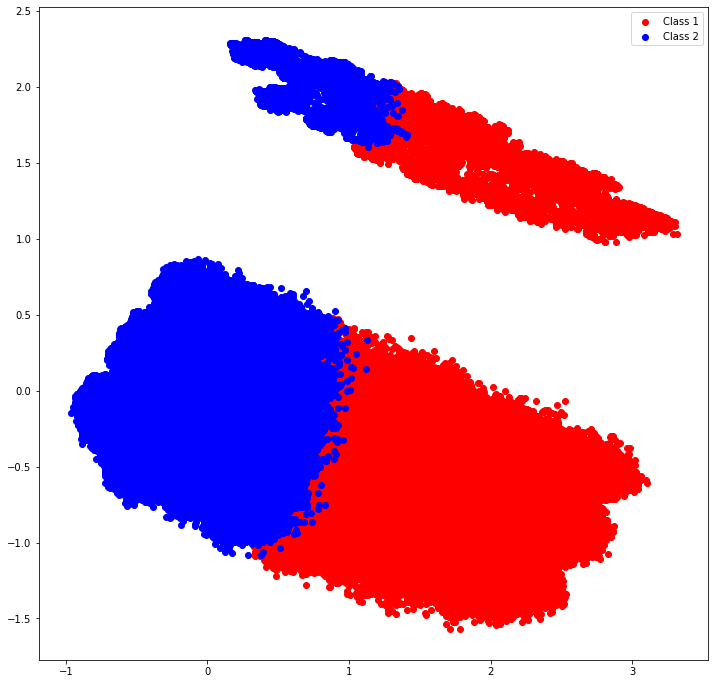

In [26]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA (n_components =2)
X_pca = pca.fit_transform (X_scaled)

plt.figure (figsize =(12,12))
plt.scatter (X_pca [labels==0, 0], X_pca [labels==0, 1], label ="Class 1", c="red")
plt.scatter (X_pca [labels==1, 0], X_pca [labels==1, 1], label ="Class 2", c="blue")

plt.legend()
plt.show()

# Aproximación 1:
##        Agrupacion Categorias + colinealidad +  correlación 

In [27]:
df=pd.read_csv("./Data/paso_2_agrupaciones.csv", sep=',')

In [28]:
df.dtypes

Unnamed: 0                                  int64
ward_id                                     int64
count_floors_pre_eq                         int64
age_building                              float64
plinth_area_sq_ft                         float64
height_ft_pre_eq                          float64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64
has_superstructure_cement_mortar_brick      int64
has_superstructure_timber                   int64


In [29]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [30]:
df.shape

(818700, 34)

### 1. Transformamos los datos y el target a matriz numérica con la que trabajar

In [31]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

df.damage_grade = le.fit_transform(df.damage_grade)

In [32]:
df_num = pd.get_dummies(df, drop_first= False) 

In [33]:
df_num.shape

(818700, 68)

In [34]:
df_num.dtypes

ward_id                                         int64
count_floors_pre_eq                             int64
age_building                                  float64
plinth_area_sq_ft                             float64
height_ft_pre_eq                              float64
has_superstructure_adobe_mud                    int64
has_superstructure_mud_mortar_stone             int64
has_superstructure_stone_flag                   int64
has_superstructure_cement_mortar_stone          int64
has_superstructure_mud_mortar_brick             int64
has_superstructure_cement_mortar_brick          int64
has_superstructure_timber                       int64
has_superstructure_bamboo                       int64
has_superstructure_rc_non_engineered            int64
has_superstructure_rc_engineered                int64
has_superstructure_other                        int64
damage_grade                                    int32
count_families                                  int64
has_secondary_use           

### 2. Colinealidad de las variables input

In [35]:
df_num_X = df_num.drop(["damage_grade"], axis=1)

In [36]:
correlated_features = set()
correlation_matrix = df_num_X.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [37]:
correlated_features

{'caste_household_no_familias',
 'education_level_household_head_no_familias',
 'foundation_type_others',
 'gender_household_head_Male',
 'gender_household_head_no_familias',
 'height_ft_pre_eq',
 'income_level_household_no_familias',
 'land_surface_condition_No Flat',
 'legal_ownership_status_Private',
 'other_floor_type_Timber',
 'plan_configuration_other',
 'position_Not attached',
 'roof_type_Bamboo/Timber-Light roof'}

### 3. Eliminamos las variables input correladas que hemos identificado arriba

In [38]:
df1 = df_num.drop(['caste_household_no_familias',
 'education_level_household_head_no_familias',
 'foundation_type_others',
 'gender_household_head_Male',
 'gender_household_head_no_familias',
 'height_ft_pre_eq',
 'income_level_household_no_familias',
 'land_surface_condition_No Flat',
 'legal_ownership_status_Private',
 'other_floor_type_Timber',
 'plan_configuration_other',
 'position_Not attached',
 'roof_type_Bamboo/Timber-Light roof'], axis=1)

In [39]:
df1.shape

(818700, 55)

In [40]:
df1.dtypes

ward_id                                        int64
count_floors_pre_eq                            int64
age_building                                 float64
plinth_area_sq_ft                            float64
has_superstructure_adobe_mud                   int64
has_superstructure_mud_mortar_stone            int64
has_superstructure_stone_flag                  int64
has_superstructure_cement_mortar_stone         int64
has_superstructure_mud_mortar_brick            int64
has_superstructure_cement_mortar_brick         int64
has_superstructure_timber                      int64
has_superstructure_bamboo                      int64
has_superstructure_rc_non_engineered           int64
has_superstructure_rc_engineered               int64
has_superstructure_other                       int64
damage_grade                                   int32
count_families                                 int64
has_secondary_use                              int64
age_household_head                            

### 4. Correlación con el Target

In [41]:
tabla_correlacion= df1.corr().abs()

In [42]:
filtro = tabla_correlacion["damage_grade"].sort_values(ascending= False)
filtro

damage_grade                                 1.000000
has_superstructure_mud_mortar_stone          0.400688
foundation_type_Mud mortar-Stone/Brick       0.373611
ground_floor_type_RC                         0.339233
has_superstructure_cement_mortar_brick       0.295102
roof_type_RCC/RB/RBC                         0.292276
ground_floor_type_Mud                        0.244247
other_floor_type_RCC/RB/RBC                  0.243141
age_building                                 0.220195
has_superstructure_rc_non_engineered         0.179738
other_floor_type_Not applicable              0.167356
count_floors_pre_eq                          0.164926
has_superstructure_rc_engineered             0.162486
plinth_area_sq_ft                            0.121460
has_superstructure_bamboo                    0.100373
has_superstructure_timber                    0.096792
has_secondary_use                            0.095530
plan_configuration_L-shape                   0.073348
gender_household_head_Female

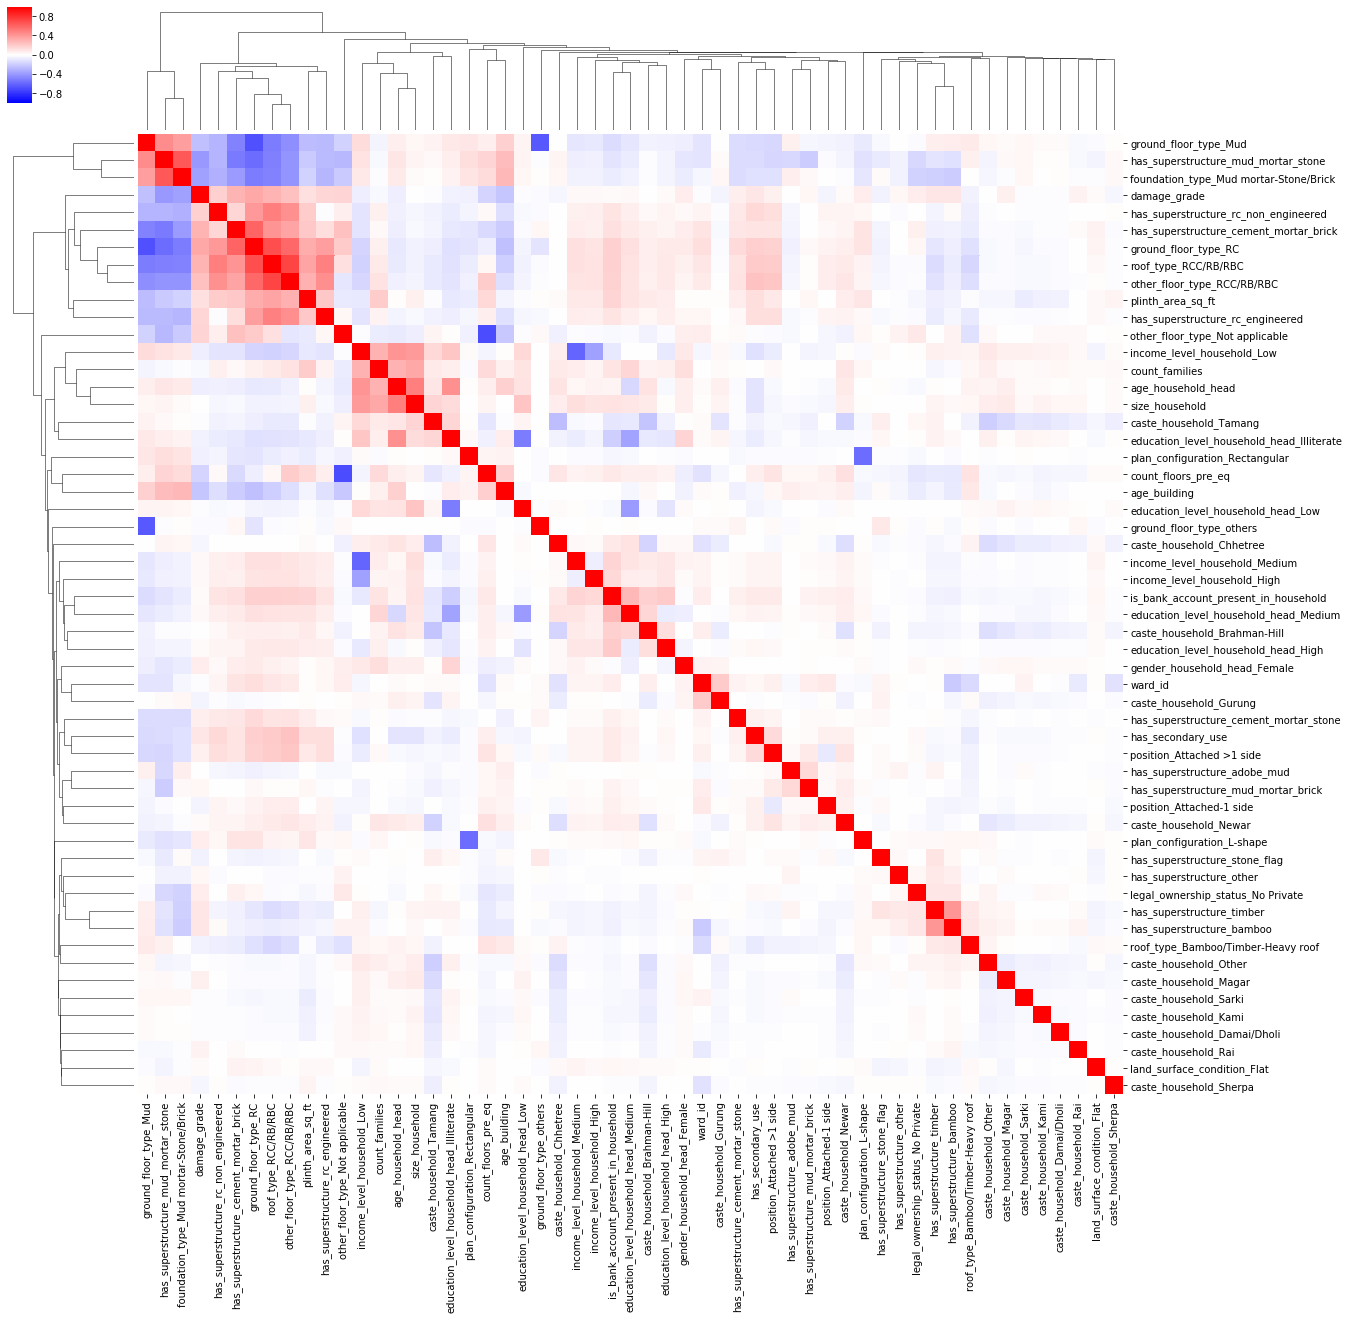

In [43]:
data=df1.corr()
matriz = sns.clustermap(data=data, cmap='bwr',vmin=-1,vmax=1,figsize=(20,20))

In [44]:
variables_a_eliminar = pd.DataFrame(filtro [filtro<0.05])
variables_a_eliminar

,damage_grade
education_level_household_head_Illiterate,0.047343
position_Attached-1 side,0.042744
caste_household_Gurung,0.041884
caste_household_Chhetree,0.038212
has_superstructure_mud_mortar_brick,0.037651
has_superstructure_other,0.037281
caste_household_Sherpa,0.031747
income_level_household_Medium,0.028283
income_level_household_High,0.025973
count_families,0.024386


In [45]:
# De las 55, nos dice de eliminar 26 variables!!

In [46]:
variables_a_eliminar.T.columns

Index(['education_level_household_head_Illiterate', 'position_Attached-1 side',
       'caste_household_Gurung', 'caste_household_Chhetree',
       'has_superstructure_mud_mortar_brick', 'has_superstructure_other',
       'caste_household_Sherpa', 'income_level_household_Medium',
       'income_level_household_High', 'count_families',
       'education_level_household_head_Medium', 'caste_household_Newar',
       'education_level_household_head_High',
       'is_bank_account_present_in_household', 'ground_floor_type_others',
       'land_surface_condition_Flat', 'caste_household_Damai/Dholi',
       'caste_household_Tamang', 'caste_household_Sarki',
       'caste_household_Kami', 'ward_id', 'education_level_household_head_Low',
       'size_household', 'caste_household_Other',
       'has_superstructure_adobe_mud', 'caste_household_Brahman-Hill'],
      dtype='object')

In [47]:
df1_corr= df1.drop(['education_level_household_head_Illiterate', 'position_Attached-1 side',
       'caste_household_Gurung', 'caste_household_Chhetree',
       'has_superstructure_mud_mortar_brick', 'has_superstructure_other',
       'caste_household_Sherpa', 'income_level_household_Medium',
       'income_level_household_High', 'count_families',
       'education_level_household_head_Medium', 'caste_household_Newar',
       'education_level_household_head_High',
       'is_bank_account_present_in_household', 'ground_floor_type_others',
       'land_surface_condition_Flat', 'caste_household_Damai/Dholi',
       'caste_household_Tamang', 'caste_household_Sarki',
       'caste_household_Kami', 'ward_id', 'education_level_household_head_Low',
       'size_household', 'caste_household_Other',
       'has_superstructure_adobe_mud', 'caste_household_Brahman-Hill'], axis=1)

In [48]:
df1_corr.dtypes

count_floors_pre_eq                         int64
age_building                              float64
plinth_area_sq_ft                         float64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_cement_mortar_brick      int64
has_superstructure_timber                   int64
has_superstructure_bamboo                   int64
has_superstructure_rc_non_engineered        int64
has_superstructure_rc_engineered            int64
damage_grade                                int32
has_secondary_use                           int64
age_household_head                          int64
foundation_type_Mud mortar-Stone/Brick      uint8
roof_type_Bamboo/Timber-Heavy roof          uint8
roof_type_RCC/RB/RBC                        uint8
ground_floor_type_Mud                       uint8
ground_floor_type_RC                        uint8
other_floor_type_Not applicable             uint8


In [49]:
df1_corr.shape

(818700, 29)

### 5. Probamos dos modelos predictivos:

In [50]:
from sklearn.model_selection import train_test_split

X= df1_corr.drop(["damage_grade"], axis=1)
y= df1_corr.damage_grade

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.4)

In [51]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(X_train,y_train)

print("Scoring training:", clf_dummy.score(X_train, y_train))
print("Scoring test    :", clf_dummy.score(X_test, y_test))

Scoring training: 0.604826757868165
Scoring test    : 0.604351410773177


In [52]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)

XGBClassifier()

In [53]:
from sklearn.metrics import accuracy_score

y_pred = modelXGB.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.98%


In [54]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
from sklearn.metrics import accuracy_score

y_pred = modelRF.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.05%


# Aproximación 2:
##        Agrupacion Categorias + colinealidad +  correlación + RFECV

In [56]:
df1_corr.shape

(818700, 29)

In [57]:
X = df1_corr.drop(["damage_grade"], axis=1)
y= df1_corr.damage_grade

In [58]:
X.shape

(818700, 28)

In [59]:
df1_corr.dtypes

count_floors_pre_eq                         int64
age_building                              float64
plinth_area_sq_ft                         float64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_cement_mortar_brick      int64
has_superstructure_timber                   int64
has_superstructure_bamboo                   int64
has_superstructure_rc_non_engineered        int64
has_superstructure_rc_engineered            int64
damage_grade                                int32
has_secondary_use                           int64
age_household_head                          int64
foundation_type_Mud mortar-Stone/Brick      uint8
roof_type_Bamboo/Timber-Heavy roof          uint8
roof_type_RCC/RB/RBC                        uint8
ground_floor_type_Mud                       uint8
ground_floor_type_RC                        uint8
other_floor_type_Not applicable             uint8


In [60]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=28, n_informative=10, n_redundant=10, random_state=1)
# create pipeline
rfe = RFECV(estimator=RandomForestClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Accuracy: 0.819 (0.029)
Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 2.000
Column: 5, Selected False, Rank: 8.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 5.000
Column: 12, Selected False, Rank: 4.000
Column: 13, Selected False, Rank: 3.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected False, Rank: 7.000
Column: 21, Selected False, Rank: 6.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Colu

In [61]:
# rank 1
"count_floors_pre_eq",
"age_building",
"has_superstructure_mud_mortar_stone",
"has_superstructure_cement_mortar_brick",
"has_superstructure_timber",
"has_superstructure_bamboo",
"has_superstructure_rc_non_engineered",
"has_superstructure_rc_engineered",
"ground_floor_type_Mud",
"ground_floor_type_RC",
"other_floor_type_RCC/RB/RBC",
"plan_configuration_Rectangular",
"caste_household_Magar",
"caste_household_Rai",
"income_level_household_Low",

#resto (13)
"gender_household_head_Female",
"legal_ownership_status_No Private",
"plinth_area_sq_ft",
"other_floor_type_Not applicable",
"has_superstructure_stone_flag",
"age_household_head",
"roof_type_RCC/RB/RBC",
"roof_type_Bamboo/Timber-Heavy roof",
"has_superstructure_cement_mortar_stone",
"plan_configuration_L-shape",
"has_secondary_use",
"foundation_type_Mud mortar-Stone/Brick",
"position_Attached >1 side"

'position_Attached >1 side'

In [62]:
df_aprox2= df1_corr.drop(["gender_household_head_Female",
"legal_ownership_status_No Private",
"plinth_area_sq_ft",
"other_floor_type_Not applicable",
"has_superstructure_stone_flag",
"age_household_head",
"roof_type_RCC/RB/RBC",
"roof_type_Bamboo/Timber-Heavy roof",
"has_superstructure_cement_mortar_stone",
"plan_configuration_L-shape",
"has_secondary_use",
"foundation_type_Mud mortar-Stone/Brick",
"position_Attached >1 side"], axis=1)

In [63]:
from sklearn.model_selection import train_test_split

X= df_aprox2.drop(["damage_grade"], axis=1)
y= df_aprox2.damage_grade

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.4)

In [64]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)

XGBClassifier()

In [65]:
from sklearn.metrics import accuracy_score

y_pred = modelXGB.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.01%


In [66]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
from sklearn.metrics import accuracy_score

y_pred = modelRF.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.95%


# Aproximación 3:
##        Agrupacion Categorias + colinealidad + RFECV

In [68]:
df1.shape

(818700, 55)

###  RFE CV

In [69]:
X = df1.drop(["damage_grade"], axis=1)
y= df1.damage_grade

In [70]:
X.shape

(818700, 54)

In [71]:
df1.dtypes

ward_id                                        int64
count_floors_pre_eq                            int64
age_building                                 float64
plinth_area_sq_ft                            float64
has_superstructure_adobe_mud                   int64
has_superstructure_mud_mortar_stone            int64
has_superstructure_stone_flag                  int64
has_superstructure_cement_mortar_stone         int64
has_superstructure_mud_mortar_brick            int64
has_superstructure_cement_mortar_brick         int64
has_superstructure_timber                      int64
has_superstructure_bamboo                      int64
has_superstructure_rc_non_engineered           int64
has_superstructure_rc_engineered               int64
has_superstructure_other                       int64
damage_grade                                   int32
count_families                                 int64
has_secondary_use                              int64
age_household_head                            

#### Definimos numero optimo de features y calculamos el accuracy de un modelo sencillo

In [72]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=54, n_informative=10, n_redundant=10, random_state=1)
# create pipeline
rfe = RFECV(estimator=RandomForestClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Accuracy: 0.832 (0.034)
Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 30.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 21.000
Column: 7, Selected False, Rank: 8.000
Column: 8, Selected False, Rank: 27.000
Column: 9, Selected False, Rank: 32.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 24.000
Column: 13, Selected False, Rank: 29.000
Column: 14, Selected False, Rank: 31.000
Column: 15, Selected False, Rank: 14.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected False, Rank: 3.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected False, Rank: 28.000
Column: 21, Selected False, Rank: 33.000
Column: 22, Selected False, Rank: 6.000
Column: 23, Selected False, Rank: 5.000
Column: 24, Selected True,

In [73]:
# rank 1
"ward_id",
"count_floors_pre_eq",
"age_building",
"plinth_area_sq_ft",
"has_superstructure_mud_mortar_stone",
"has_superstructure_timber",
"has_superstructure_bamboo",
"has_secondary_use",
"size_household",
"is_bank_account_present_in_household",
"ground_floor_type_Mud",
"other_floor_type_Not applicable",
"position_Attached-1 side",
"caste_household_Brahman-Hill",
"caste_household_Chhetree",
"caste_household_Newar",
"caste_household_Sarki",
"education_level_household_head_High",
"income_level_household_Medium",


#resto
"caste_household_Magar",
"plan_configuration_Rectangular",
"age_household_head",
"roof_type_RCC/RB/RBC",
"caste_household_Tamang",
"has_superstructure_stone_flag",
"education_level_household_head_Low",
"other_floor_type_RCC/RB/RBC",
"ground_floor_type_others",
"legal_ownership_status_No Private",
"has_superstructure_cement_mortar_stone",
"position_Attached >1 side",
"income_level_household_Low",
"caste_household_Kami",
"gender_household_head_Female",
"ground_floor_type_RC",
"land_surface_condition_Flat",
"has_superstructure_cement_mortar_brick",
"plan_configuration_L-shape",
"caste_household_Rai",
"caste_household_Damai/Dholi",
"caste_household_Gurung",
"caste_household_Sherpa",
"count_families",
"has_superstructure_rc_non_engineered",
"has_superstructure_rc_engineered",
"education_level_household_head_Illiterate",
"has_superstructure_adobe_mud",
"foundation_type_Mud mortar-Stone/Brick",
"has_superstructure_mud_mortar_brick",
"has_superstructure_other",
"education_level_household_head_Medium",
"caste_household_Other",
"income_level_household_High",
"roof_type_Bamboo/Timber-Heavy roof",

('roof_type_Bamboo/Timber-Heavy roof',)

In [74]:
df_aprox3 = df1.drop(["roof_type_RCC/RB/RBC",
"caste_household_Tamang",
"has_superstructure_stone_flag",
"education_level_household_head_Low",
"other_floor_type_RCC/RB/RBC",
"ground_floor_type_others",
"legal_ownership_status_No Private",
"has_superstructure_cement_mortar_stone",
"position_Attached >1 side",
"income_level_household_Low",
"caste_household_Kami",
"gender_household_head_Female",
"ground_floor_type_RC",
"land_surface_condition_Flat",
"has_superstructure_cement_mortar_brick",
"plan_configuration_L-shape",
"caste_household_Rai",
"caste_household_Damai/Dholi",
"caste_household_Gurung",
"caste_household_Sherpa",
"count_families",
"has_superstructure_rc_non_engineered",
"has_superstructure_rc_engineered",
"education_level_household_head_Illiterate",
"has_superstructure_adobe_mud",
"foundation_type_Mud mortar-Stone/Brick",
"has_superstructure_mud_mortar_brick",
"has_superstructure_other",
"education_level_household_head_Medium",
"caste_household_Other",
"income_level_household_High",
"roof_type_Bamboo/Timber-Heavy roof"], axis=1)

In [75]:
from sklearn.model_selection import train_test_split

X= df_aprox3.drop(["damage_grade"], axis=1)
y= df_aprox3.damage_grade

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.4)

In [76]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(X_train,y_train)

print("Scoring training:", clf_dummy.score(X_train, y_train))
print("Scoring test    :", clf_dummy.score(X_test, y_test))

Scoring training: 0.6043178209356297
Scoring test    : 0.6051148161719799


### Aplicamos un XGBoost y un RF

In [77]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)

XGBClassifier()

In [78]:
from sklearn.metrics import accuracy_score

y_pred = modelXGB.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.08%


In [79]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
from sklearn.metrics import accuracy_score

y_pred = modelRF.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.40%


# Aproximación 4:
##        Agrupacion Categorias + colinealidad

In [81]:
df1.shape

(818700, 55)

In [82]:
from sklearn.model_selection import train_test_split

X= df1.drop(["damage_grade"], axis=1)
y= df1.damage_grade

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.4)

In [83]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(X_train,y_train)

print("Scoring training:", clf_dummy.score(X_train, y_train))
print("Scoring test    :", clf_dummy.score(X_test, y_test))

Scoring training: 0.6043687146288832
Scoring test    : 0.6050384756320997


In [84]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)

XGBClassifier()

In [85]:
from sklearn.metrics import accuracy_score

y_pred = modelXGB.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.51%


In [86]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
from sklearn.metrics import accuracy_score

y_pred = modelRF.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.03%


# Aproximación 5:
##        Agrupacion Categorias + XGBoost

In [88]:
df=pd.read_csv("./Data/paso_2_agrupaciones.csv", sep=',')

In [89]:
df.drop(["Unnamed: 0", "ward_id"], axis=1, inplace=True)

In [90]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

df.damage_grade = le.fit_transform(df.damage_grade)

In [91]:
df.dtypes

count_floors_pre_eq                         int64
age_building                              float64
plinth_area_sq_ft                         float64
height_ft_pre_eq                          float64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64
has_superstructure_cement_mortar_brick      int64
has_superstructure_timber                   int64
has_superstructure_bamboo                   int64
has_superstructure_rc_non_engineered        int64


In [92]:
df_num= pd.get_dummies(df, drop_first= False) 

In [93]:
X= df_num.drop(["damage_grade"], axis=1)
y= df_num.damage_grade

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.4, random_state=0)

In [95]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(X_train,y_train)

print("Scoring training:", clf_dummy.score(X_train, y_train))
print("Scoring test    :", clf_dummy.score(X_test, y_test))

Scoring training: 0.6048471153454664
Scoring test    : 0.6043208745572248


In [96]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)

XGBClassifier()

In [97]:
from sklearn.metrics import accuracy_score

y_pred = modelXGB.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.10%


In [98]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
from sklearn.metrics import accuracy_score

y_pred = modelRF.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.66%


# Aproximación 6:
##        Agrupacion Categorias +  RFECV

In [100]:
df=pd.read_csv("./Data/paso_2_agrupaciones.csv", sep=',')

In [101]:
df.drop(["Unnamed: 0", "ward_id"], axis=1, inplace=True)

In [102]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

df.damage_grade = le.fit_transform(df.damage_grade)

In [103]:
df.dtypes

count_floors_pre_eq                         int64
age_building                              float64
plinth_area_sq_ft                         float64
height_ft_pre_eq                          float64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64
has_superstructure_cement_mortar_brick      int64
has_superstructure_timber                   int64
has_superstructure_bamboo                   int64
has_superstructure_rc_non_engineered        int64


In [104]:
df_num= pd.get_dummies(df, drop_first= False) 

In [105]:
df_num.shape

(818700, 67)

In [106]:
df_num.dtypes

count_floors_pre_eq                             int64
age_building                                  float64
plinth_area_sq_ft                             float64
height_ft_pre_eq                              float64
has_superstructure_adobe_mud                    int64
has_superstructure_mud_mortar_stone             int64
has_superstructure_stone_flag                   int64
has_superstructure_cement_mortar_stone          int64
has_superstructure_mud_mortar_brick             int64
has_superstructure_cement_mortar_brick          int64
has_superstructure_timber                       int64
has_superstructure_bamboo                       int64
has_superstructure_rc_non_engineered            int64
has_superstructure_rc_engineered                int64
has_superstructure_other                        int64
damage_grade                                    int32
count_families                                  int64
has_secondary_use                               int64
age_household_head          

In [107]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=66, n_informative=10, n_redundant=10, random_state=1)
# create pipeline
rfe = RFECV(estimator=RandomForestClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Accuracy: 0.829 (0.031)
Column: 0, Selected False, Rank: 10.000
Column: 1, Selected False, Rank: 29.000
Column: 2, Selected False, Rank: 12.000
Column: 3, Selected False, Rank: 27.000
Column: 4, Selected False, Rank: 39.000
Column: 5, Selected False, Rank: 30.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 46.000
Column: 9, Selected False, Rank: 47.000
Column: 10, Selected False, Rank: 7.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 4.000
Column: 13, Selected False, Rank: 36.000
Column: 14, Selected False, Rank: 16.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected False, Rank: 48.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected False, Rank: 5.000
Column: 20, Selected False, Rank: 31.000
Column: 21, Selected False, Rank: 3.000
Column: 22, Selected False, Rank: 22.000
Column: 23, Selected False, Rank: 24.000
Column: 24, Select

In [108]:
# rank 1
"has_superstructure_cement_mortar_stone",
"has_superstructure_bamboo",
"has_secondary_use",
"size_household",
"ground_floor_type_RC",
"other_floor_type_Timber",
"legal_ownership_status_Private",
"caste_household_Damai/Dholi",
"caste_household_Newar",
"caste_household_Sarki",
"education_level_household_head_Illiterate",
"income_level_household_High",


#resto
"other_floor_type_RCC/RB/RBC",
"has_superstructure_stone_flag",
"ground_floor_type_Mud",
"caste_household_Chhetree",
"other_floor_type_Not applicable",
"caste_household_Other",
"count_families",
"position_Attached-1 side",
"caste_household_Magar",
"has_superstructure_rc_non_engineered",
"caste_household_Rai",
"roof_type_Bamboo/Timber-Light roof",
"foundation_type_Mud mortar-Stone/Brick",
"gender_household_head_Female",
"ground_floor_type_others",
"foundation_type_others",
"plinth_area_sq_ft",
"is_bank_account_present_in_household",
"income_level_household_Medium",
"gender_household_head_no_familias",
"has_superstructure_timber",
"has_superstructure_cement_mortar_brick",
"count_floors_pre_eq",
"has_superstructure_rc_engineered",
"position_Attached >1 side",
"education_level_household_head_High",
"roof_type_Bamboo/Timber-Heavy roof",
"education_level_household_head_Medium",
"height_ft_pre_eq",
"income_level_household_no_familias",
"plan_configuration_L-shape",
"has_superstructure_other",
"caste_household_Gurung",
"plan_configuration_other",
"age_household_head",
"caste_household_Sherpa",
"gender_household_head_Male",
"caste_household_Tamang",
"position_Not attached",
"education_level_household_head_no_familias",
"legal_ownership_status_No Private",
"income_level_household_Low",
"caste_household_Brahman-Hill",
"has_superstructure_adobe_mud",
"age_building",
"land_surface_condition_No Flat",
"caste_household_no_familias",
"plan_configuration_Rectangular",
"roof_type_RCC/RB/RBC",
"education_level_household_head_Low",
"has_superstructure_mud_mortar_brick",
"has_superstructure_mud_mortar_stone",
"caste_household_Kami",
"land_surface_condition_Flat",


('land_surface_condition_Flat',)

In [109]:
df_aprox6 = df_num.drop(["other_floor_type_RCC/RB/RBC",
"has_superstructure_stone_flag",
"ground_floor_type_Mud",
"caste_household_Chhetree",
"other_floor_type_Not applicable",
"caste_household_Other",
"count_families",
"position_Attached-1 side",
"caste_household_Magar",
"has_superstructure_rc_non_engineered",
"caste_household_Rai",
"roof_type_Bamboo/Timber-Light roof",
"foundation_type_Mud mortar-Stone/Brick",
"gender_household_head_Female",
"ground_floor_type_others",
"foundation_type_others",
"plinth_area_sq_ft",
"is_bank_account_present_in_household",
"income_level_household_Medium",
"gender_household_head_no_familias",
"has_superstructure_timber",
"has_superstructure_cement_mortar_brick",
"count_floors_pre_eq",
"has_superstructure_rc_engineered",
"position_Attached >1 side",
"education_level_household_head_High",
"roof_type_Bamboo/Timber-Heavy roof",
"education_level_household_head_Medium",
"height_ft_pre_eq",
"income_level_household_no_familias",
"plan_configuration_L-shape",
"has_superstructure_other",
"caste_household_Gurung",
"plan_configuration_other",
"age_household_head",
"caste_household_Sherpa",
"gender_household_head_Male",
"caste_household_Tamang",
"position_Not attached",
"education_level_household_head_no_familias",
"legal_ownership_status_No Private",
"income_level_household_Low",
"caste_household_Brahman-Hill",
"has_superstructure_adobe_mud",
"age_building",
"land_surface_condition_No Flat",
"caste_household_no_familias",
"plan_configuration_Rectangular",
"roof_type_RCC/RB/RBC",
"education_level_household_head_Low",
"has_superstructure_mud_mortar_brick",
"has_superstructure_mud_mortar_stone",
"caste_household_Kami",
"land_surface_condition_Flat"], axis=1)

In [111]:
from sklearn.model_selection import train_test_split

X= df_aprox6.drop(["damage_grade"], axis=1)
y= df_aprox6.damage_grade

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.4)

In [112]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(X_train,y_train)

print("Scoring training:", clf_dummy.score(X_train, y_train))
print("Scoring test    :", clf_dummy.score(X_test, y_test))

Scoring training: 0.6050649403525915
Scoring test    : 0.6039941370465371


### Aplicamos un XGBoost y un RF

In [113]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)

XGBClassifier()

In [114]:
from sklearn.metrics import accuracy_score

y_pred = modelXGB.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.73%


In [115]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

RandomForestClassifier()

In [116]:
from sklearn.metrics import accuracy_score

y_pred = modelRF.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.61%
